In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import exp

#preprocessing

In [9]:
df = pd.read_csv("L:/bucket/kinetics/0838_001_exercise.txt", sep='\t')

In [10]:
df = df.filter(['TCD1'])

In [11]:
df = df.drop([df.index[0], df.index[1]])

In [12]:
tcd1= df.filter(['TCD1'])

#time1=3
#timearray=[]
#for i in tcd1.iterrows():
    #timearray.append(time1)
   # time1+=3
#df['Time']=timearray
#print(tcd1)


recs=len(df['TCD1'])
print(recs)
i=1
timevals=[]
while i<=recs:
    t=3*i
    timevals.append(t)
    i+=1
df['Time']=timevals
#df=df.set_index('Time')
print(df)

217
            TCD1  Time
2    87.01770247     3
3    72.15364587     6
4    60.70711294     9
5    70.96275777    12
6    89.98779381    15
..           ...   ...
214  77.69685343   639
215  78.06888037   642
216  70.73520999   645
217  75.57977334   648
218  82.08814819   651

[217 rows x 2 columns]


In [13]:
df['TCD1'] = df['TCD1'].astype(float)

In [14]:
df = df.reset_index()

In [15]:
df.drop(['index'], axis=1, inplace=True)

          TCD1  Time
0    87.017702     3
1    72.153646     6
2    60.707113     9
3    70.962758    12
4    89.987794    15
..         ...   ...
212  77.696853   639
213  78.068880   642
214  70.735210   645
215  75.579773   648
216  82.088148   651

[217 rows x 2 columns]


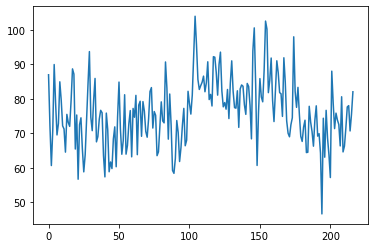

In [16]:
plt.plot(df['TCD1'])
print(df)

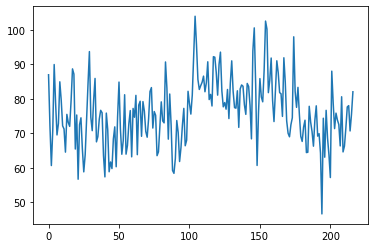

In [17]:
plt.plot(df['TCD1'])

#Curve fitting

In [27]:
def func(y0, amp, TD, tau, t):
    return y0 + amp * (1 - exp(((t*-1)-TD)/tau))

In [19]:
xdata = df.index.values
ydata = df['TCD1']

In [28]:
popt, pcov = curve_fit(func, xdata, ydata)

In [29]:
y0 = popt[0]
amp = popt[1]
TD = popt[2]
tau = popt[3]
t= df['Time']
print(y0)
print(amp)
print(TD)
print(tau)

-34.39944283064874
415.1172208322683
320.5233323555889
415.11722065237535


In [31]:
def func(y0, amp, TD, tau, t):
    return y0 + amp * (1 - exp(((t*-1)-TD)/tau))
my_time= df['Time']
x=[]
i=1
while i <= 657:
    x.append(i)
    i+=1
y = []
for r in my_time:
    myval = y0 + amp * (1 - exp(((r*-1)-TD)/tau))
    float(myval)
    y.append(myval)
print(my_time)
print(y)

Time
3        3
6        6
9        9
12      12
15      15
      ... 
639    639
642    642
645    645
648    648
651    651
Name: Time, Length: 217, dtype: int64
[190.30261034220348, 191.67375631838513, 193.03502891467213, 194.38649922752853, 195.72823784146527, 197.06031483272665, 198.38279977295036, 199.6957617328011, 200.99926928557767, 202.293390510795, 203.57819299773917, 204.85374384899802, 206.1201096839652, 207.37735664232014, 208.625550387482, 209.8647561100393, 211.09503853115461, 212.316461905945, 213.52909002683754, 214.73298622690146, 215.92821338315576, 217.11483391985314, 218.29290981174012, 219.46250258729424, 220.6236733319373, 221.77648269122562, 222.92099087401783, 224.0572576556189, 225.18534238090268, 226.3053039674109, 227.4172009084307, 228.52109127604894, 229.61703272418606, 230.70508249160673, 231.78529740490933, 232.8577338814939, 233.92244793250887, 234.9794951657762, 236.02893078869573, 237.07080961112865, 238.10518604826, 239.1321141234406, 240.1516474710

In [23]:
df=df.set_index(df['Time'])
df['Y']=y

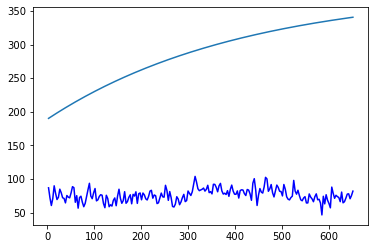

In [24]:
plt.plot(df['TCD1'], 'b-')
plt.plot(my_time, y, label='y = y0 + amp * (1 - exp((-t-TD)/tau))') 

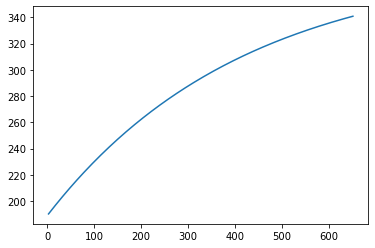

In [25]:
plt.plot(my_time, y, label='y = y0 + amp * (1 - exp((-t-TD)/tau))')